In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from maskrcnn import inference

In [19]:
def get_cells_with_rcnn(images_arrays):
    cells = []

    # low_quality_images_arrays = self.pdf_file_to_array(dpi=self.low_dpi)
    low_quality_images_arrays = images_arrays

    for num, image in enumerate(low_quality_images_arrays):
        copy_image = image.copy()
        weights = os.getcwd() + "\maskrcnn\weights\cell_classification.pth"
        weights = os.getcwd() + "\maskrcnn\weights\cell_detection.pth"
        weights = os.getcwd() + "\maskrcnn\weights\table_plot.pth"
        mode = "table_plot" # of "cells"
        _, boxes, labels = inference.get_bboxes_of_objects(image, weights, threshold=0.8, mode=mode)
        print(boxes, labels)

        for box, label in zip(boxes, labels):
            [x1, y1], [x2, y2] = box
            if label == "head":
                cv2.rectangle(copy_image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                label_text = f"{label}"
                cv2.putText(copy_image, label_text, (int(x1), int(y1)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
            else:
                cv2.rectangle(copy_image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)
                label_text = f"{label}"
                cv2.putText(copy_image, label_text, (int(x1), int(y1)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        plt.imshow(cv2.cvtColor(copy_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

In [20]:
def image_file_to_array(file_path):
        # Открываем изображение с использованием Pillow
        img = cv2.imread(file_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Преобразуем изображение в массив NumPy
        img_array = np.array(img_rgb)
        return [img_array]

['__background__', 'cell', 'head'] ['__background__', 'table', 'plot']
['__background__', 'table', 'plot']
[[(0, 6), (495, 369)]] ['table', 'table', 'table', 'table', 'plot', 'plot']


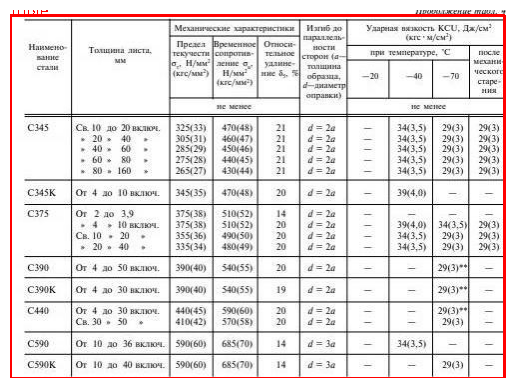

In [22]:
file_path = "000007.png"
image = image_file_to_array(file_path)
get_cells_with_rcnn(image)